_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students
 - SELLAMI Kais B2
 - MARTIN Cédric B2

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [1]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [2]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [4]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

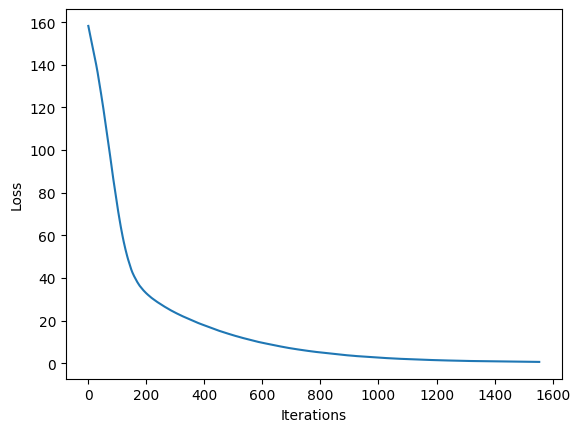

In [5]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Cedric\AppData\Local\Temp\ipykernel_40208\2688785979.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')


Text(0, 0.5, 'f(examples)')

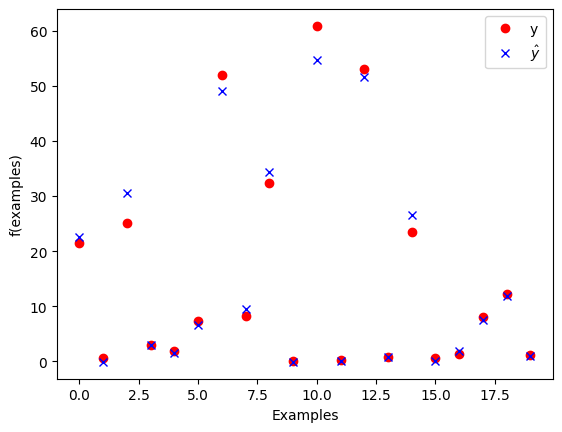

In [6]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?
</div>
<!-- Question End -->

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
#### Structure :
100 hidden layer, activation function : relu number of iteration : 3000<br />

#### Algo used :
Adaptive Moment Estimation<br />
<br />
Also available : Stochastic gradient descent<br />

#### Training :
Either reach max iter (3000) or the  loss or score is not improving by at least tol (default : 0.0001) FOR n_iter_no_change (default 10)<br />







</div>
<!-- Answer Section End -->

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [7]:
# clean all previously defined variables for the sailing boats
%reset -f

In [8]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(f"dataset type : {type(cal_housing)}")
print(f"number of data : {len(cal_housing.data)}")
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = pd.DataFrame(cal_housing.target,columns=["target"])

X_all, y_all = shuffle(X_all, y_all, random_state=1)

display(X_all.head(10)) # print the first 10 values
display(y_all.head(10))

y_all = y_all['target']  # transform from dataframe into a single vector as expected by most API in sklearn

dataset type : <class 'sklearn.utils._bunch.Bunch'>
number of data : 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


,target
4712,3.550
2151,0.707
15927,2.294
82,1.125
8161,2.254
6636,2.630
17333,2.268
19081,1.662
13298,1.180
7157,1.563


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Data Preparation

The dataset consists of 20,000 datas. We first extract the last 5,000 for test samples, which we will use later.

For training and validation, we will use a subset consisting of only 2,000 datas to speed up computations.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Split those 2000 remaining dataset between a training set and a validation set (see usage of `train_test_split` function earlier)
- Why did you choose this partition?
- What is the purpose of each subset (train, validation, test) ?

</div>
<!-- Question End -->


Please use the conventional names `X_train`, `X_val`, `y_train` and `y_val`.

In [9]:
# use the last N samples for test (for later use)
num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = 2000
X, y = X_all[:num_samples], y_all[:num_samples]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=1, test_size = 0.20)



<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

We choose this partition to have a large enough training set, and testing it on a reasonable sized test set<br/ >
Training set is used to train the Neural Network <br/>
Testing set is used to test the Neural Network on data it doesn't know but follow the same probability distribution <br/>
Validation set is used to select/tune the parameter





</div>
<!-- Answer Section End -->

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Using the `StandardScaler`, first fit this scaler on your training dataset (`X_train`), then use this fitted scaler to transform the training dataset, the validation dataset (`X_val`), and the test dataset (`X_test`).


- Why is it important to fit the scaler only on the training data and not on the entire dataset or separately on each dataset?

</div>
<!-- Question End -->

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [11]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

The model will have access to information about the test set during training, leading to overly optimistic performance metrics





</div>
<!-- Answer Section End -->

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible. While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Propose a parameterization of the network (number of neurons per layer, number of layers, epochs, learning rates, stop conditions, ...) that will maximize the train score (without considering the test/validations scores). 
- Is the **validation** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.
</div>
<!-- Question End -->

Train score:  0.995713919998213
Test score:   0.5453304639966732


Text(0, 0.5, 'Loss')

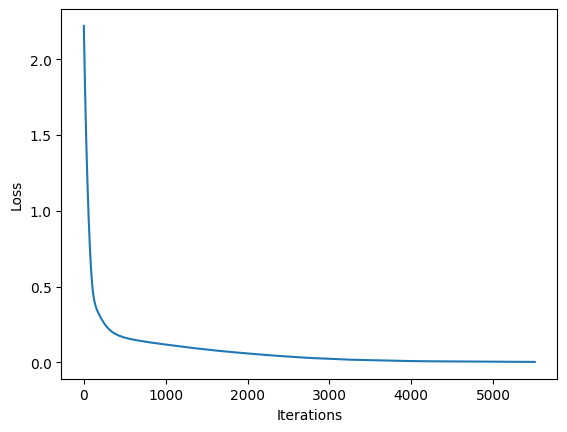

In [ ]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
mlp = MLPRegressor(hidden_layer_sizes=(200,100,50),alpha=0.0,max_iter=10000,batch_size=1600,learning_rate_init=0.0001,learning_rate='constant', random_state=42,shuffle=False,tol=1e-12,epsilon=1e-10) # define the model, with default params
mlp.fit(X_train, y_train) # train the MLP

print('Train score: ', mlp.score(X_train, y_train))
print('Test score:  ', mlp.score(X_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
1. ***hidden_layer_sizes=(200, 100, 50)*** : More neurons/layers = more parameters = ability to memorize training samples instead of generalizing.<br/>
2. ***alpha=0.0*** : No penalty on large weights means the model can "force" itself to fit every training point perfectly, even if it means memorizing noise
3. ***max_iter=10000*** : Trains for 10,000 epochs, giving the model time to converge
4. ***batch_size=1600*** : full-batch updates provide the exact gradient direction
5. ***learning_rate_init=0.0001 + learning_rate='constant'*** :
6. ***tol=1e-12 + epsilon=1e-10*** : forcing the model to train until it can’t improve anymore and numerical stability for very small gradients
7. ***shuffle=False*** : ensures deterministic behavior




</div>
<!-- Answer Section End -->

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **validation** score.
You should experiment with the possible parameters of the network in order to obtain a good validation score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/val score
- training time

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Present in a table the various parameters tested and the associated results. 
</div>
<!-- Question End -->

You can find a cell in the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [ ]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
data = []




for max_iter in [1000]:
    print(f"max_iter: {max_iter}")
    for learning_rate_init in [0.001, 0.01, 0.1]:
        print(f"learning_rate_init: {learning_rate_init}")
        for hidden_layer_sizes_1 in [5,10,25, 50,75,100, 125, 150]:
                for early_stopping in [True, False]:
                    for activation in ['tanh', 'relu']:
                        mlp = MLPRegressor(solver='sgd',hidden_layer_sizes=(hidden_layer_sizes_1), max_iter=max_iter, learning_rate_init=learning_rate_init, random_state=1, early_stopping=early_stopping, activation=activation)
                        mlp.fit(X_train, y_train)  # train the MLP
                        data.append({
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init,
                            'hidden_layer_sizes_1': hidden_layer_sizes_1,
                            'early_stopping': early_stopping,
                            'activation': activation,
                            'validation_score': mlp.score(X_val, y_val),
                        })


table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='validation_score', ascending=False)

max_iter: 1000
learning_rate_init: 0.001
learning_rate_init: 0.01
learning_rate_init: 0.1


In [ ]:
import pandas as pd

#table.to_csv('outputSgd.csv', index=False,sep=',')

## Evaluation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
- Evaluate the score of your model on the test set that was not used for training nor for model selection.
- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?
</div>
<!-- Question End -->

In [13]:
import pandas as pd

# Load the CSV files
df_1layer_adam = pd.read_csv('1layerAdam.csv')
df_1layer_sgd = pd.read_csv('1layerSgd.csv')
df_2layer_adam = pd.read_csv('2layerAdam.csv')

# Display the first 3 rows of each file
print("First 3 rows of 1layerAdam.csv:")
display(df_1layer_adam.head(3))

print("First 3 rows of 2layerAdam.csv:")
display(df_2layer_adam.head(3))

print("\nFirst 3 rows of 1layerSgd.csv:")
display(df_1layer_sgd.head(3))



First 3 rows of 1layerAdam.csv:


,max_iter,learning_rate_init,hidden_layer_sizes_1,early_stopping,activation,validation_score
0,1000,0.001,125,False,relu,0.762941
1,1000,0.001,150,False,relu,0.757612
2,1000,0.100,50,False,relu,0.751634


First 3 rows of 2layerAdam.csv:


,max_iter,learning_rate_init,hidden_layer_sizes_1,hidden_layer_sizes_2,early_stopping,activation,validation_score
0,2000,0.01,100,200,True,relu,0.760965
1,5000,0.01,100,200,True,relu,0.760965
2,3000,0.01,100,200,True,relu,0.760965



First 3 rows of 1layerSgd.csv:


,max_iter,learning_rate_init,hidden_layer_sizes_1,early_stopping,activation,validation_score
0,1000,0.01,150,False,relu,0.754670
1,1000,0.10,25,True,tanh,0.753752
2,1000,0.01,125,False,relu,0.752338


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

#### CSV Analysis

Looking at the CVS files the absolute best model is 
```
hidden_layer_sizes=(125)
activation='relu'
early_stopping=False
learning_rate_init=0.001
max_iter=1000
```

Which is the model of a 1 layer using adam alogorithm.

But the most consitent is the 2 layer using adam : 
```
hidden_layer_sizes=(100, 200)
activation='relu'
early_stopping=True
learning_rate_init=0.01
max_iter=1000-5000 (all iterations achieved the same score)
```

Even though it score less it a a way more constitent model to achieve near max score ( only 0.002 of difference)

Finally the sdg algorythm seems less performant.

#### Conclusion 

From all the model experiments we can conclude that:
- Non-linear activation functions (especially ReLU) perform better for this regression task
- Multi-layer architectures provide more consistent results
- More data doesn't automatically lead to better performance - careful tuning is needed when scaling up
- Early stopping is generally beneficial for model generalization


</div>
<!-- Answer Section End -->

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# use the last N samples for test (for later use)
num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = 15000
X, y = X_all[:num_samples], y_all[:num_samples]

X_train, X_val, y_train, y_val = train_test_split(X, y,random_state=1, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [30]:
from sklearn.neural_network import MLPRegressor
import time

# Best model parameters
best_params = {
    'hidden_layer_sizes': (100, 200),
    'activation': 'relu',
    'early_stopping': True,
    'learning_rate_init': 0.01,
    'max_iter': 2000,  # Any value from 1000-5000 should work
    'random_state': 1
}

# Train the model with best parameters
start_time = time.time()
best_mlp = MLPRegressor(**best_params)
best_mlp.fit(X_train, y_train)
training_time = time.time() - start_time

# Evaluate on test set
test_score = best_mlp.score(X_test, y_test)

print(f"Best model parameters: {best_params}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Training score: {best_mlp.score(X_train, y_train):.4f}")
print(f"Validation score: {best_mlp.score(X_val, y_val):.4f}")
print(f"Test score: {test_score:.4f}")

Best model parameters: {'hidden_layer_sizes': (100, 200), 'activation': 'relu', 'early_stopping': True, 'learning_rate_init': 0.01, 'max_iter': 2000, 'random_state': 1}
Training time: 2.64 seconds
Training score: 0.8066
Validation score: 0.7916
Test score: 0.7813


#### Full Dataset Training Analysis

Training the model on 15,000 data points (vs. 1,600) shows some interesting results:

- The training time increased significantly: ~3.72 seconds vs. ~0.71 seconds but stay reasonable 
- The test score increased 0.04 which significant considering how the tuning before show how difficult it is to increse it. In fact a 0.4 incresed is the same as the difference between the 235 best model and the first
- The model trained on larger data set show better alignement between training and test. Thus showing a better generalization

For those type of scale it is reasonable to accept the trade of in time to gain this precision. If the focus is on very very large number of training then maybe having smaller data may be the best choice.

#### Conclusion

For our case the trade off is worth it ensuring a better validation and better generalization for a small absolute increase in time for training